### Calculation of $n[r]$ for an ideal gas

$n[r]$ represents the average number of particles found at a distance $d$ where $r\leq d \leq r + \Delta r$ from a given particle $i$. For an ideal gas, the position of all particles is independent.


Write a MC code where $N=1000$ particoles are uniformly distributed inside a 2D box of size $L=10$. Compute all pair distances $R_{ij},\{i,1,N-1\},\{j,i+1,N\}$ and accumulate the value $r_{ij}$ (increment of 1 in the counts of both particles) at bin number $r_{ij}/\Delta r$.

All $N$ particoles are identical, so a common count is enough. Just accumulate 1 in both bins of particles $i$ and $j$ -> increment by 2.

Properly normalize the histogram dividing by $N$ x Nsamples

The pair distances $r_{ij}$ must be computed as the smallest distance between the images of particles $i$ and $j$.

The plot togheter the resulting histogram and the theoretical value the function $n(r)=2\pi r$.

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt

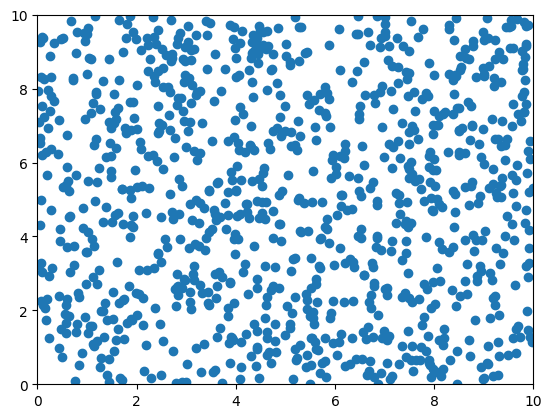

In [2]:
N = 1000
L = 10

Particles = np.zeros((N, 2))

for i in range(N):
    Particles[i][0] = random.random() * L # random x coordinate
    Particles[i][1] = random.random() * L # random y coordinate

# plot the particles
plt.scatter(Particles[:,0], Particles[:,1])
plt.xlim(0, L)
plt.ylim(0, L)
plt.show()

In [3]:
# The pair distance mus be computed as the smallest distance between the IMAGES of the particles
def distance(x1, y1, x2, y2):
    r1 = np.array([min(x1,abs(L-x1)), min(y1,abs(L-y1))])
    r2 = np.array([min(x2,abs(L-x2)), min(y2,abs(L-y2))])

    return math.sqrt((r1[0]-r2[0])**2 + (r1[1]-r2[1])**2)

# Compute all pair distances 
Distances = np.zeros((N, N))

for i in range(N):
    for j in range(N):
        Distances[i][j] = distance(Particles[i][0], Particles[i][1], Particles[j][0], Particles[j][1])
        
        # Check if there are distances greather than L/2 * sqrt(2)
        if Distances[i][j] > L/2 * math.sqrt(2):
            print("There are particles with distance greater than L/2 * sqrt(2)")

# Check if distance between i and j is equal to j and i
for i in range(N):
    for j in range(N):
        if Distances[i][j] != Distances[j][i]:
            print(f"Distance between particle {i} and particle {j} is not equal to distance between particle {j} and particle {i}")
            

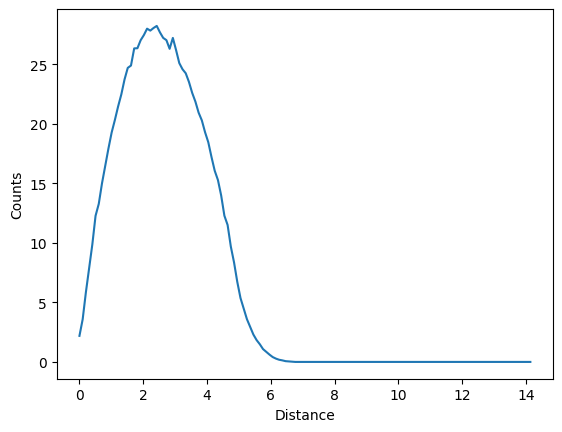

In [4]:
DeltaR = 0.1
Nbin = int(L*math.sqrt(2) / DeltaR)
Distances = Distances.flatten()

# compute the histogram of the distances 
hist = np.zeros(Nbin)
for i in range(N**2):
    hist[int(Distances[i] / DeltaR)] += 1

hist = hist / N

r = np.linspace(0, L * math.sqrt(2), Nbin)

# plot the histogram
plt.plot(r, hist)
plt.xlabel(r'Distance')
plt.ylabel(r'Counts')
plt.show()

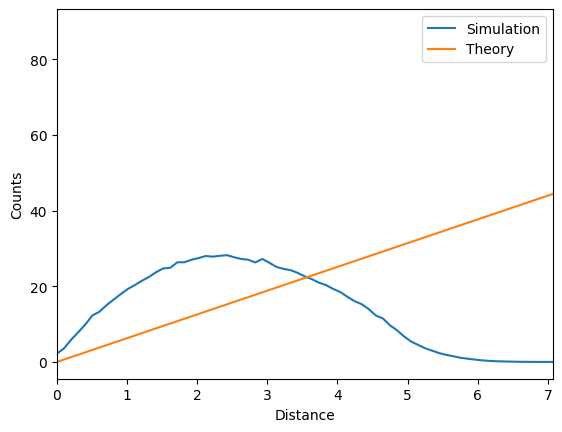

In [5]:
# Plot togheter the resulting histogram and the expected distribution n(r) = 2 * pi * r
r = np.linspace(0, L * math.sqrt(2), Nbin)
n = (N/L**2) * 2 * math.pi * r * DeltaR

plt.plot(r, hist, label='Simulation')
plt.plot(r, n, label='Theory')
plt.xlabel(r'Distance')
plt.xlim(0, L/2 * math.sqrt(2))
plt.ylabel(r'Counts')
plt.legend()
plt.show()

C:\Users\giova\AppData\Local\Temp\ipykernel_20188\345498912.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(r, hist / n)


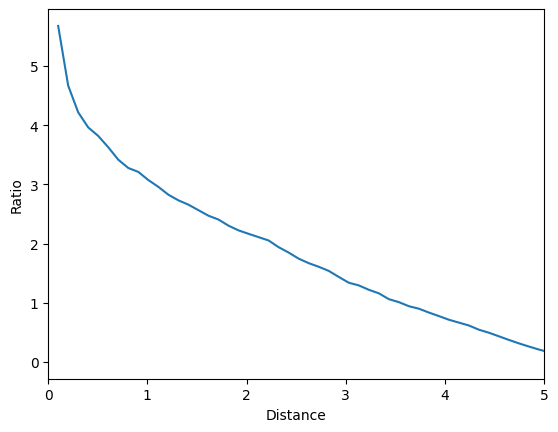

In [6]:
#Polt the ratio of Monte Carlo result over the expected distribution
plt.plot(r, hist / n)
plt.xlabel(r'Distance')
plt.ylabel(r'Ratio')
plt.xlim(0, L * 0.5)
plt.show()